Achmad Dhiaulhaq PYTN-KS018-019

### Import library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import RobustScaler
import category_encoders as ce
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

### Import dataset

In [2]:
X_data = pd.read_csv(r"C:\Users\Adi\Documents\codingan\data\bank+marketing\bank-additional\bank-additional\bank-additional-full.csv", sep=';')

In [3]:
X_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Cleaning data

In [5]:
# Membersihkan data menggunakan fungsi replace dengan mengganti semua data eror menjadi 0
X_data.replace(np.nan, 0,  inplace=True)
X_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
# mengecek data eror
X_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Mengecek data duplikat
X_data.duplicated().sum()

12

## Mengubah jenis data object menjadi interger

In [8]:
# Mengubah data month dari tipe data object menjadi tipe data interger 
months = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec': 12}
X_data['month'] = X_data['month'].map(months)
X_data['month'].head()

0    5
1    5
2    5
3    5
4    5
Name: month, dtype: int64

In [9]:
# Mengubah data default dari tipe data object menjadi tipe data interger 
default = {'yes':1, 'no':2}
X_data['default'] = X_data['default'].map(default)
X_data['default'].head()

0    2.0
1    NaN
2    2.0
3    2.0
4    2.0
Name: default, dtype: float64

In [10]:
X_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,2.0,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,2.0,yes,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,2.0,no,no,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,2.0,no,yes,telephone,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
# membuat variabel dengan membuat dummies pada tipe data object supaya data mudah ditrain
X_1 = pd.get_dummies(X_data, columns=['job', 
                               'marital', 
                               'education',  
                               'housing', 
                               'loan',
                               'day_of_week',  
                               'contact', 
                               'poutcome'])

In [12]:
X_1

,age,default,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2.0,5,261,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
1,57,NaN,5,149,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
2,37,2.0,5,226,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
3,40,2.0,5,151,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
4,56,2.0,5,307,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2.0,11,334,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0
41184,46,2.0,11,383,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0
41185,56,2.0,11,189,2,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0
41186,44,2.0,11,442,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0


In [13]:
# Membersihkan data X_1
X_1.replace(np.nan, 0,  inplace=True)
X_1

,age,default,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,2.0,5,261,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
1,57,0.0,5,149,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
2,37,2.0,5,226,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
3,40,2.0,5,151,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
4,56,2.0,5,307,1,999,0,1.1,93.994,-36.4,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2.0,11,334,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0
41184,46,2.0,11,383,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0
41185,56,2.0,11,189,2,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0
41186,44,2.0,11,442,1,999,0,-1.1,94.767,-50.8,...,1,0,0,0,0,1,0,0,1,0


In [14]:
# Membuat kolom target dengan mengubah data y menjadi 1 atau 0
X_1['target'] = X_1['y'].apply(lambda row: 1 if row == 'yes' else 0)
X_1[['y', 'target']].head()

,y,target
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


In [15]:
# Menghapus kolom y supaya tidak ada tipe data object
X_1.drop(columns=['y'], inplace=True)

In [16]:
X_1

,age,default,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,2.0,5,261,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,1,0,0
1,57,0.0,5,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,1,0,0
2,37,2.0,5,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,1,0,0
3,40,2.0,5,151,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,1,0,0
4,56,2.0,5,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2.0,11,334,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,1,0,0,1,0,1
41184,46,2.0,11,383,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,1,0,0,1,0,0
41185,56,2.0,11,189,2,999,0,-1.1,94.767,-50.8,...,0,0,0,0,1,0,0,1,0,0
41186,44,2.0,11,442,1,999,0,-1.1,94.767,-50.8,...,0,0,0,0,1,0,0,1,0,1


# Train data

In [17]:
# Membuat variabel untuk train data
X = X_1.drop('target', axis=1)
y = X_1['target']

In [18]:
# Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

### LogisticRegression

In [19]:
# Menggunakan model
logit = LogisticRegression()

# Melatih model
logit.fit(X_train, y_train)

# Melihat akurasi model
akurasi = logit.score(X, y)
print("akurasi:", akurasi)

akurasi: 0.9092939691172186


### KNN

In [20]:
# Mengimport library KNN
from sklearn.neighbors import KNeighborsClassifier
# Menggunakan model
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

# Prediksi model
y_pred = knn.predict(X_test.values)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.8967386906207008
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     10935
           1       0.56      0.48      0.52      1422

    accuracy                           0.90     12357
   macro avg       0.75      0.72      0.73     12357
weighted avg       0.89      0.90      0.89     12357



### SVM

In [21]:
# Mengimport library SVC
from sklearn.svm import SVC

# Menggunakan model SVM
svm = SVC()

# Melatih model
svm.fit(X_train, y_train)

# Memprediksi data
svmprediksi = svm.predict(X_test)
print("nilai prediksi: ", svmprediksi[:10])

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

nilai prediksi:  [0 0 0 0 0 0 0 0 1 0]
Akurasi: 0.8967386906207008
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     10935
           1       0.56      0.48      0.52      1422

    accuracy                           0.90     12357
   macro avg       0.75      0.72      0.73     12357
weighted avg       0.89      0.90      0.89     12357



### Decision Tree

In [22]:
# Menggunakan model
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

# Prediksi model
y_pred = DT.predict(X_test)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.8914785142024764
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     10935
           1       0.53      0.54      0.53      1422

    accuracy                           0.89     12357
   macro avg       0.73      0.74      0.74     12357
weighted avg       0.89      0.89      0.89     12357



### Random Forest

In [23]:
# Menggunakan model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Prediksi model
y_pred = rf.predict(X_test)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.9097677429796877
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10935
           1       0.65      0.46      0.54      1422

    accuracy                           0.91     12357
   macro avg       0.79      0.72      0.75     12357
weighted avg       0.90      0.91      0.90     12357



### Naive Bayes

In [24]:
# import library
from sklearn.naive_bayes import GaussianNB

# Menggunakan model
NV = GaussianNB()

# Melatih model
NV.fit(X_train, y_train)

# Prediksi model
y_pred = NV.predict(X_test)

# Menghitung akurasi
akurasi = accuracy_score(y_test, y_pred)
print("Akurasi:", akurasi)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Akurasi: 0.8402524884680748
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.91     10935
           1       0.36      0.51      0.43      1422

    accuracy                           0.84     12357
   macro avg       0.65      0.70      0.67     12357
weighted avg       0.87      0.84      0.85     12357



### Visual Data

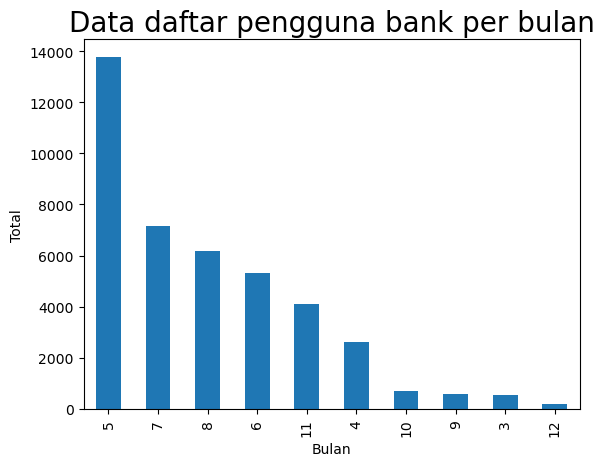

In [25]:
# Visualisasi data menggunakan data histogram
X_data['month'].value_counts().plot.bar()
plt.title("Data daftar pengguna bank per bulan", size=20)
plt.xlabel("Bulan")
plt.ylabel("Total")
plt.show()

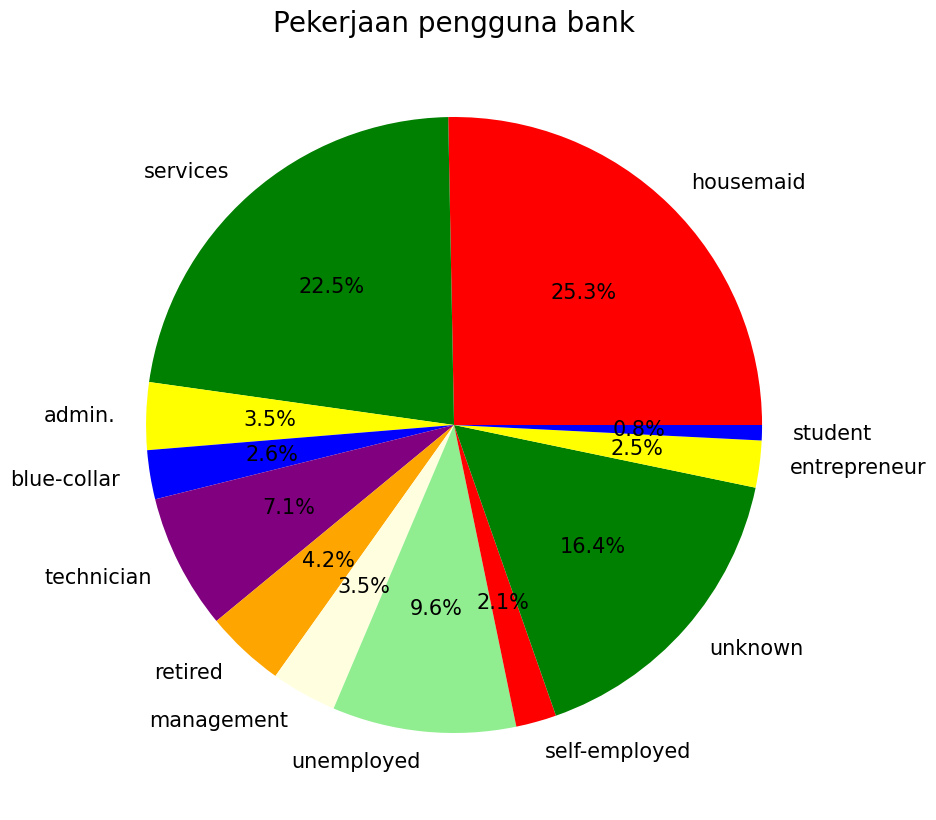

In [26]:
# membuat visualisasi data menggunakan pie chart
lables = X_data['job'].unique()
sizes = X_data.groupby(['job']).size()
colors=['red','green','yellow','blue', 'purple','orange','lightyellow','lightgreen']

plt.figure(figsize = (20,10))
plt.title('Pekerjaan pengguna bank', size=20)
plt.pie(sizes, labels = lables, colors = colors, autopct = '%1.1f%%', textprops = {'fontsize': 15,'color':'black'})
plt.show()

### Analisis

Random forest cocok dengan dataset ini. Dilihat dari score tertinggi dari semua model machine learning. 